<a href="https://colab.research.google.com/github/Ameer-Mohammed/test2/blob/main/test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret==2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.6/255.6 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.8/328.8 KB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 77.0 MB/s eta 0:00:00

In [2]:
from pycaret.classification import *

In [3]:
#This library is to work with data
import pandas as pd 
# This library is to work with vectors
import numpy as np
# This library is to create some graphics algorithmn
import seaborn as sns
# to render the graphs
import matplotlib.pyplot as plt
# import module to set some ploting parameters
from matplotlib import rcParams
# Library to work with Regular Expressions
import re

# This function makes the plot directly on browser
%matplotlib inline

# Seting a universal figure size 
rcParams['figure.figsize'] = 10,8

In [4]:
# Importing train dataset
path = "https://github.com/Shakib-IO/INSE_6220_Lab_Winter_2023/blob/main/Titanic_Train.csv?raw=true"
df_train = pd.read_csv(path)

In [34]:
# Importing train dataset
path = "https://github.com/Shakib-IO/INSE_6220_Lab_Winter_2023/blob/main/Titanic_Train.csv?raw=true"
path2= "https://github.com/Ameer-Mohammed/test2/blob/main/accelerometer.csv?raw=true"
df_train = pd.read_csv(path2)

In [13]:
print("The shape of the Data:", df_train.shape)


The shape of the Data: (153000, 5)


In [35]:
#Looking data format and types
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB
None


In [36]:
df_train.describe()


,wconfid,pctid,x,y,z
count,153000.000000,153000.000000,153000.000000,153000.000000,153000.000000
mean,2.000000,60.000000,0.995622,0.005351,-0.117769
std,0.816499,24.494977,0.773958,0.742602,0.517008
min,1.000000,20.000000,-8.000000,-8.000000,-5.867000
25%,1.000000,40.000000,0.945000,-0.078000,-0.172000
50%,2.000000,60.000000,0.992000,0.008000,-0.125000
75%,3.000000,80.000000,1.039000,0.105000,-0.066000
max,3.000000,100.000000,7.996000,7.996000,6.086000


In [37]:
#Take a look at the data
print(df_train.head())

   wconfid  pctid      x      y      z
0        1     20  1.004  0.090 -0.125
1        1     20  1.004 -0.043 -0.125
2        1     20  0.969  0.090 -0.121
3        1     20  0.973 -0.012 -0.137
4        1     20  1.000 -0.016 -0.121


In [38]:
df_train.isnull()


,wconfid,pctid,x,y,z
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
152995,False,False,False,False,False
152996,False,False,False,False,False
152997,False,False,False,False,False
152998,False,False,False,False,False


In [39]:
df_train.isnull().sum()


wconfid    0
pctid      0
x          0
y          0
z          0
dtype: int64

In [40]:
df_train["x"].head(10)


0    1.004
1    1.004
2    0.969
3    0.973
4    1.000
5    0.961
6    0.973
7    1.000
8    0.969
9    0.973
Name: x, dtype: float64

In [41]:
df_train.head(10)


,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121
5,1,20,0.961,0.082,-0.121
6,1,20,0.973,-0.055,-0.109
7,1,20,1.000,0.012,-0.133
8,1,20,0.969,-0.102,-0.141
9,1,20,0.973,-0.059,-0.125


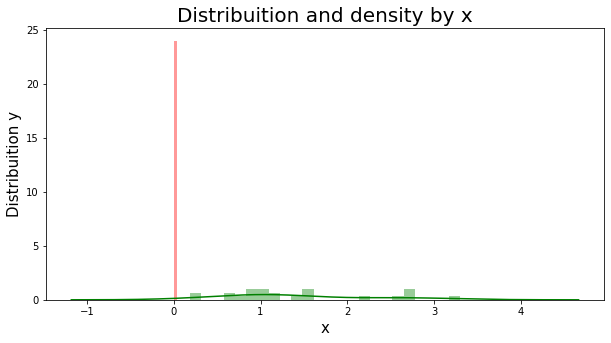

In [42]:
#First I will look my distribuition without NaN's
#I will create a df to look distribuition 
age_high_zero_died = df_train[(df_train["x"] > 0) & 
                              (df_train["y"] == 0)]
age_high_zero_surv = df_train[(df_train["x"] > 0) & 
                              (df_train["y"] == 1)]

#figure size
plt.figure(figsize=(10,5))

# Ploting the 2 variables that we create and compare the two
sns.distplot(age_high_zero_surv["x"], bins=24, color='g')
sns.distplot(age_high_zero_died["y"], bins=24, color='r')
plt.title("Distribuition and density by x",fontsize=20)
plt.xlabel("x",fontsize=15)
plt.ylabel("Distribuition y",fontsize=15)
plt.show()

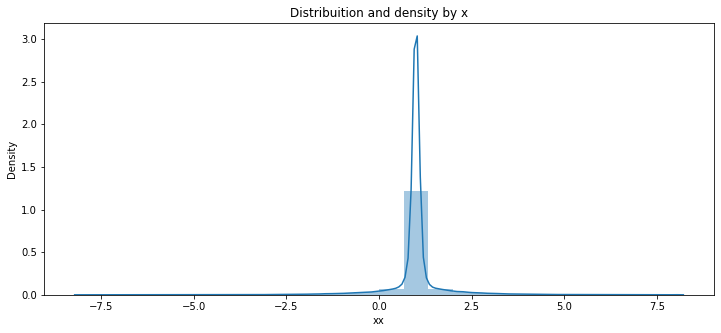

In [26]:
#Let's see the result of the inputation

#seting the figure size
plt.figure(figsize=(12,5))

#ploting again the Age Distribuition after the transformation in our dataset
sns.distplot(df_train["x"], bins=24)
plt.title("Distribuition and density by x")
plt.xlabel("xx")
plt.show()